# How to caculate density of roads in a district

The following instructions teach you how to calculate density of roads. This is something of interest in Economics and social sciences and is frequently used as a proxy both for economic development or for state penetration.

In order to calculate road density, one needs to follow a couple of steps.

In this tutorial, we will be looking at density of roads by district in Peru. Calculating density of roads by district is an instance of calculating density of polylines within a polygon. This will have wide appplicability.

In [7]:
path = "C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\"

The basic files that we will work with are the following:

- Original_latam_raster.gdb
- Original_PER_adm.gdb
- Original_Roads.gdb

# Step 1: Import ArcGIS Library

In [9]:
# Import system modules
import sys, string, os, arcgisscripting
from IPython.display import Image


# Create the Geoprocessor object
gp = arcgisscripting.create()
print "created geoprocessor object"

# Check out any necessary licenses
gp.CheckOutExtension("spatial")
gp.CheckOutExtension("3D")
print "checked extensions"

#Turn overwrite on
gp.overwriteoutput = 1
print "overwrite on"

# Set Extent
gp.Extent = "MAXOF"

created geoprocessor object
checked extensions
overwrite on


# Step 2: Examine Original geodatabases

These are are the geodatabases that I manually created and that contain the original files.
These geodatabases are:

- Original_latam_raster.gdb
- Original_PER_adm.gdb
- Original_Roads.gdb

### A. Original_latam_raster.gdb

In [10]:
arcpy.env.workspace = path + "Original_latam_raster.gdb"
fds=arcpy.ListDatasets()
for fd in fds:
    print fd

latam_raster


We will now visulize the raster.
Create a blank mxd file manually from ArcGIS, called "tutorial" in your working directory. In this case it is in ...Roads/Tutorial.

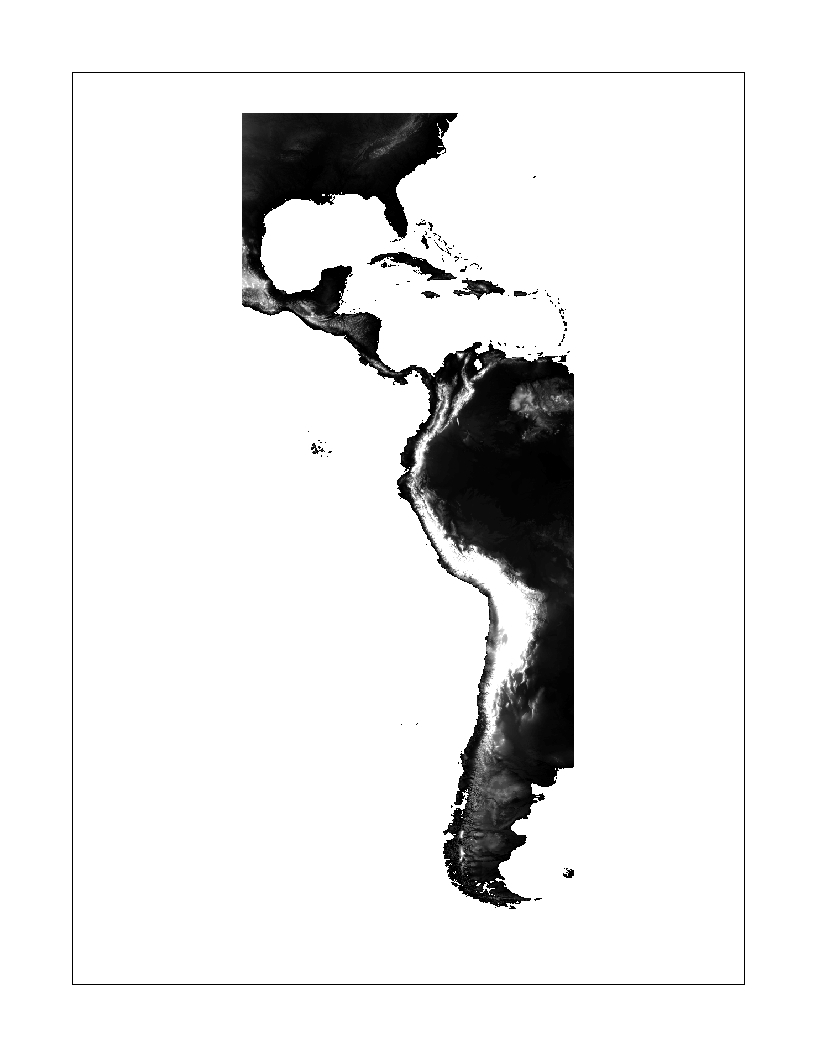

In [15]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_latam_raster.gdb\\latam_raster"
fileLayerName = 'latam_raster'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\latam_raster")
Image(path + "Tutorial\\pics\\latam_raster.jpg")

### B. Original_PER_adm.gdb

In [12]:
arcpy.env.workspace =  path +"Original_PER_adm.gdb"
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

Districts_1975
PER_adm0


We will now visulize the shapefiles. The following picture display the Peruvian districts in 1975.

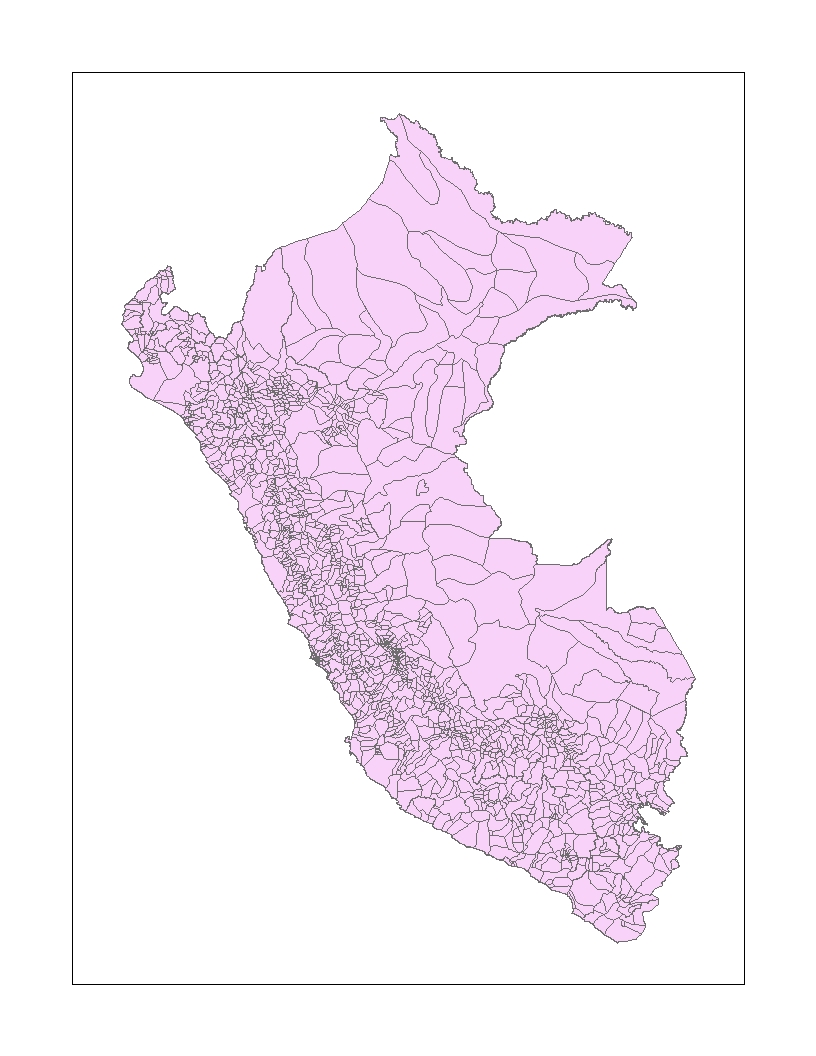

In [14]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_PER_adm.gdb\\Districts_1975"
fileLayerName = 'Districts_1975'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\Districts_1975")
Image(path + "Tutorial\\pics\\Districts_1975.jpg")

 The following picture displays the Peru shape file.

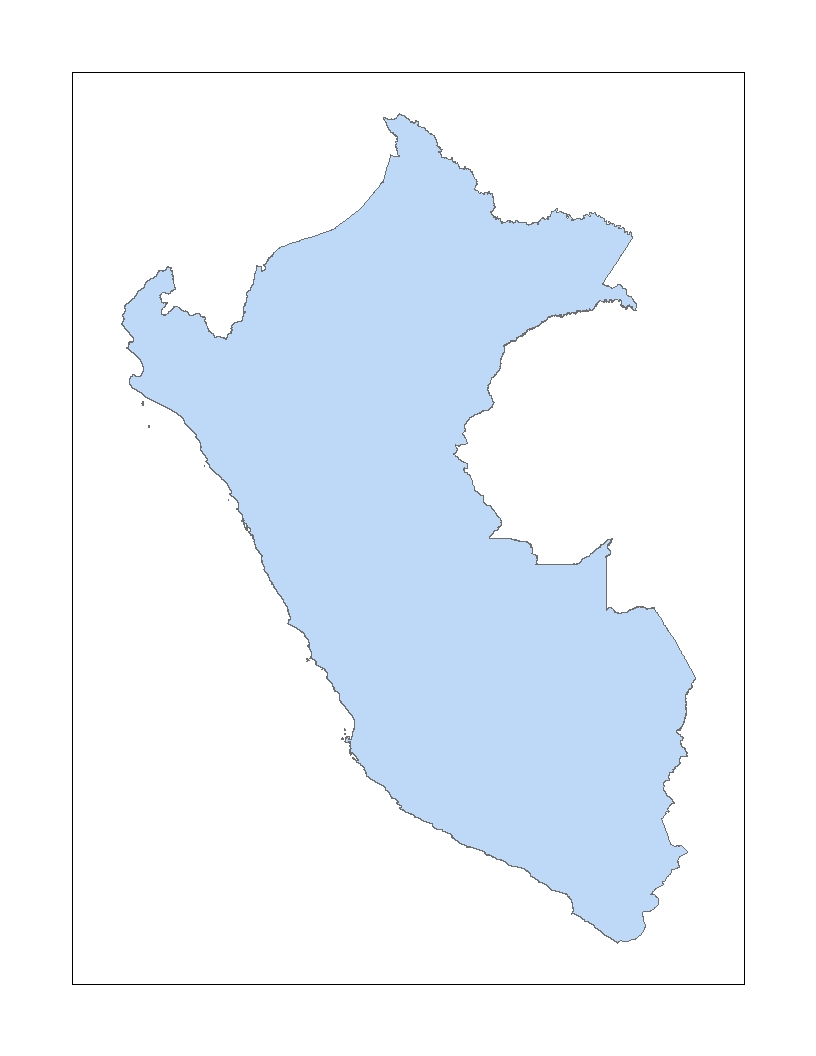

In [17]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_PER_adm.gdb\\PER_adm0"
fileLayerName = 'PER_adm0'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\PER_adm0")
Image(path + "Tutorial\\pics\\PER_adm0.jpg")

### C. Original_Roads.gdb

In [236]:
arcpy.env.workspace =  path +"Original_Roads.gdb"
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

roads_prj


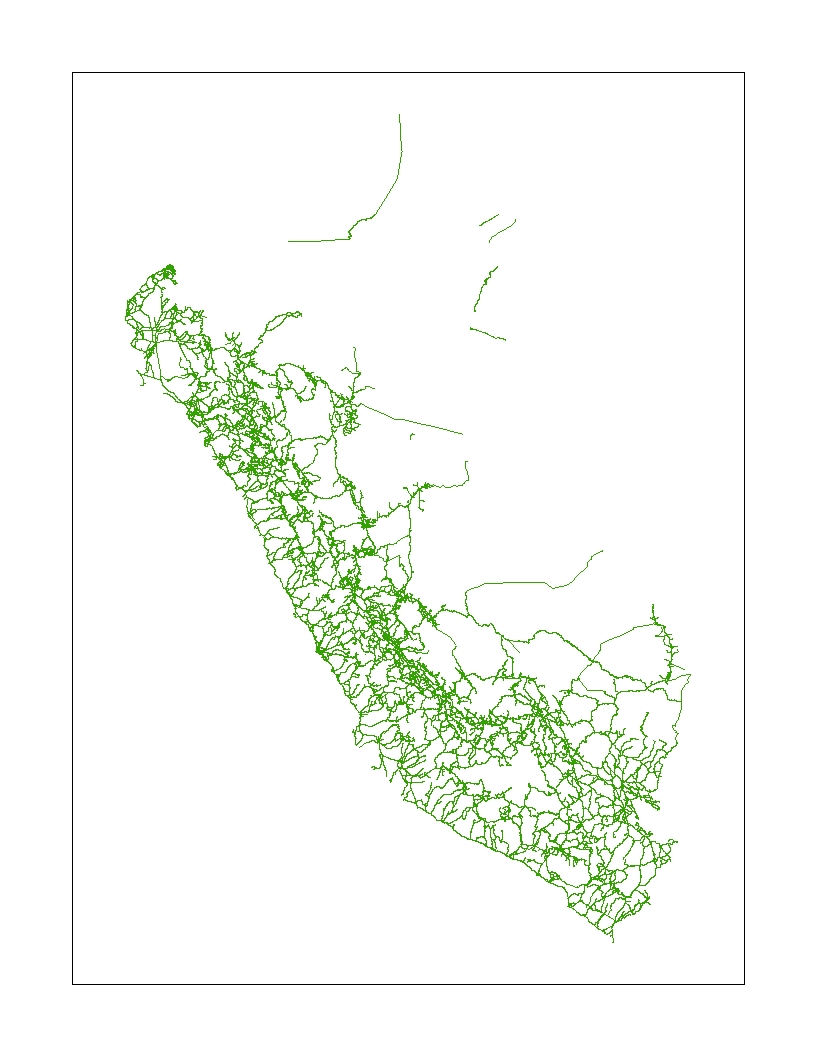

In [18]:
filePath = path + "Original_Roads.gdb\\roads_prj"
fileLayerName = 'PER_adm0'
mxdPath = path + "Tutorial\\tutorial.mxd"
md = arcpy.mapping.MapDocument(mxdPath)
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
df = arcpy.mapping.ListDataFrames(md)[0]
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\roads_prj")
Image(path + "Tutorial\\pics\\roads_prj.jpg")

# Step 3: Processing

### Process: Create File GDB

In [19]:
Roads = path
Roads_gdb = Roads
arcpy.CreateFileGDB_management(Roads, "Roads.gdb", "CURRENT")
print "Geodatabse created"

Geodatabse created


### Project shape files to WGS_1984_UTM_Zone_18N

In [20]:
# Projecting shape files
PER_adm0 = path + "Original_PER_adm.gdb\\PER_adm0"
PER_adm0__2_ = path + "Roads.gdb\\PER_adm0"
Districts_1975 = path + "Original_PER_adm.gdb\\Districts_1975"
Districts_1975__2_ = path + "Roads.gdb\\Districts_1975"
roads_prj = path + "Original_Roads.gdb\\roads_prj"
roads_prj__2_ = path + "Roads.gdb\\roads_prj"

arcpy.Project_management(PER_adm0, PER_adm0__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(Districts_1975, Districts_1975__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(roads_prj, roads_prj__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
print "Projected shape files to WGS_1984_UTM_Zone_18N"

Projected shape files to WGS_1984_UTM_Zone_18N


### Project elevation to WGS_1984_UTM_Zone_18N"

In [21]:
##Project elevation to WGS_1984_UTM_Zone_18N"
latam_raster = path + "Original_latam_raster.gdb\\latam_raster"
latam_raster__2_ = path + "Roads.gdb\\latam_raster"

arcpy.ProjectRaster_management(latam_raster, latam_raster__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "NEAREST", "4908.11440062304 4908.11440062304", "", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]")
print "Projected elevation to WGS_1984_UTM_Zone_18N"

Projected elevation to WGS_1984_UTM_Zone_18N


### Extracting by mask elevation

In [22]:
##Extracting by mask elevation
latam_raster__2_ = path + "Roads.gdb\\latam_raster"
PER_adm0__2_ = path + "Roads.gdb\\PER_adm0"
peru_raster = path + "Roads.gdb\\peru_raster"
arcpy.gp.ExtractByMask_sa(latam_raster__2_, PER_adm0__2_, peru_raster)
print "Extracted rasters to the shape of the country"

Extracted rasters to the shape of the country


Visualizing the new mask

In [23]:
filePath = path + "Roads.gdb\\peru_raster"
fileLayerName = 'peru_raster'
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)

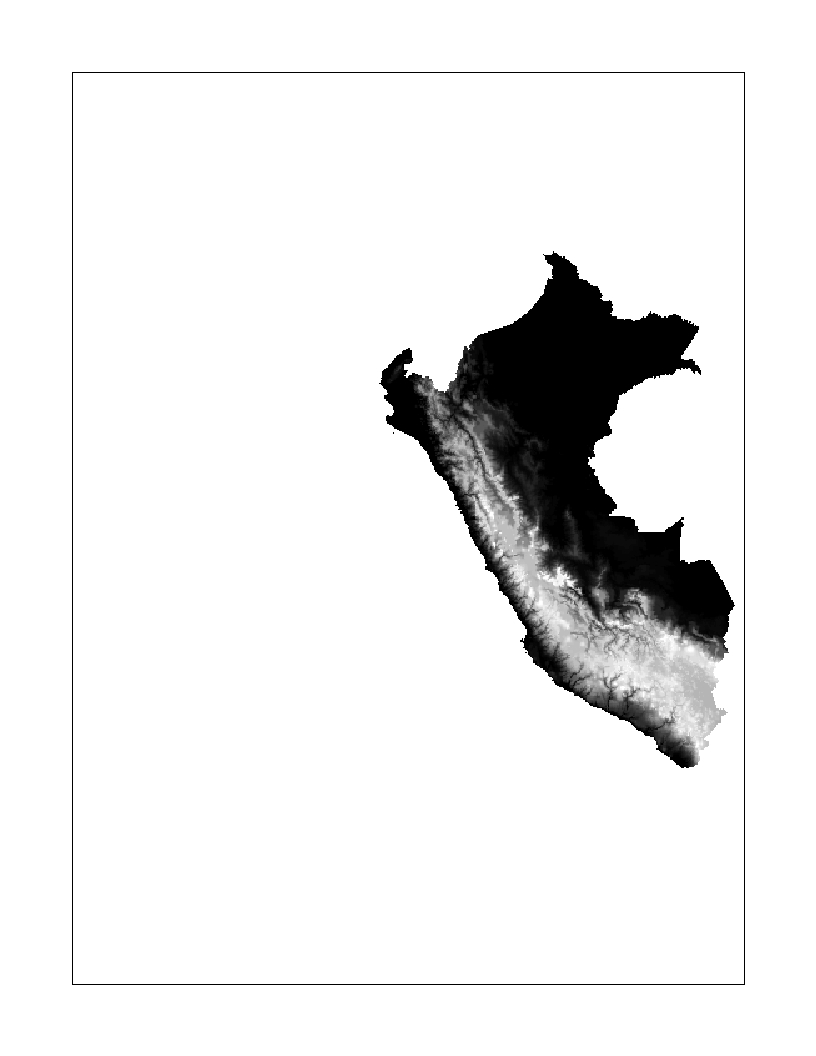

In [24]:
mxdPath = path + "Tutorial\\tutorial.mxd"
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.RefreshActiveView()
arcpy.RefreshTOC()
df.scale = 16000000 # we set the scale to 1:20,000 

#df.extent = layer.getSelectedExtent()
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\peru_raster",  "PAGE_LAYOUT")
Image(path + "Tutorial\\pics\\peru_raster.jpg")

## Step 4: Calculating Roads Vecinales

In [25]:
#################
#Roads "Vecinal"#
#################


#Road - vecinal asfaltado = vec_1
roads_prj = path + "Roads.gdb\\roads_prj"
vec_1 = path + "Roads.gdb\\vec_1"
vec_1__2_ = path + "Roads.gdb\\vec_1"
Districts_1975 = path + "Roads.gdb\\Districts_1975"
vec_1_intersect = path + "Roads.gdb\\vec_1_intersect"
vec_1_intersect__2_ = path + "Roads.gdb\\vec_1_intersect"
vec_1_intersect__3_ = vec_1_intersect__2_
peru_raster = path + "Roads.gdb\\peru_raster"


# Process: Select
arcpy.Select_analysis(roads_prj, vec_1, "RUTA = 'Vecinal' and SUPERFICIE= 1")


<Result 'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\vec_1'>

In [158]:
print "'{}Roads.gdb\\vec_1'".format(path)
print "'{}Roads.gdb\\Districts_1975'".format(path)

'C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\Roads.gdb\vec_1'


In [60]:
vec_1a = path + "Roads.gdb\\vec_1"
Districts_1975b = path + "Roads.gdb\\Districts_1975"
vec_1a2 = "'" + vec_1a + "'"
Districts_1975b2 = "'" + Districts_1975b + "'"
print vec_1a2
print Districts_1975b2
print '"' + vec_1a2 + " #;" + Districts_1975b2 + " #" + '"'
ab = '"' + vec_1a2 + " #;" + Districts_1975b2 + " #" + '"'
ab

'C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\Roads.gdb\vec_1'
'C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\Roads.gdb\Districts_1975'
"'C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\Roads.gdb\vec_1' #;'C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\Roads.gdb\Districts_1975' #"


'"\'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\vec_1\' #;\'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\Districts_1975\' #"'

In [26]:
arcpy.Intersect_analysis("'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\vec_1\' #;'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\Districts_1975' #", vec_1_intersect, "ALL", "", "INPUT")

<Result 'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\Roads.gdb\\vec_1_intersect'>

In [27]:
# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(vec_1_intersect__2_, peru_raster, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")

# Process: Alter Field
arcpy.AlterField_management(vec_1_intersect__3_, "SLength", "vec_1", "", "DOUBLE", "8", "NULLABLE", "false")
print "#Calculated length of in meters of Road - vecinal asfaltado = vec_1"


#Calculated length of in meters of Road - vecinal asfaltado = vec_1


In [28]:
# Process: Join Field
Districts_1975 = path + "\\Roads.gdb\\Districts_1975"
Districts_1975__2_ = Districts_1975
vec_1_intersect = path + "Roads.gdb\\vec_1_intersect"
arcpy.JoinField_management(Districts_1975, "codeconc", vec_1_intersect, "codeconc", "vec_1")

<Result 'C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Roads\\\\Roads.gdb\\Districts_1975'>

## Step 5: Calculating area of districts taking elevation into consideration

In [29]:

###################################################################
#Calculating area of districts taking elevation into consideration#
###################################################################

Districts_1975 = path + "\\Roads.gdb\\Districts_1975"
peru_raster = path + "\\Roads.gdb\\peru_raster"

# Process: Add Surface Information
# The area variable will be called "SArea". Units are sq meters.
arcpy.AddSurfaceInformation_3d(Districts_1975, peru_raster, "SURFACE_AREA", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d"

AddSurfaceInformation_3d


## Step 6: Density of Roads vecinales

In [30]:
############################
#Density of Roads vecinales#
############################

#Density Vecinal asfaltado = vec_1
tricts_1975 = path + "\\Roads.gdb\\Districts_1975"
Districts_1975__2_ = Districts_1975

# Process: Add Field
arcpy.AddField_management(Districts_1975, "d_vec_1", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(Districts_1975__2_, "d_vec_1", "[vec_1]/ [SArea]", "VB", "")
print "Density Vecinal asfaltado = vec_1"

Density Vecinal asfaltado = vec_1


## Step 7: Create jpegs of maps

In [57]:
arcpy.env.workspace = Roads
fields = arcpy.ListFields(path + "Roads.gdb/Districts_1975", "d_*")
mxd = arcpy.mapping.MapDocument(path + "roads.mxd")

districts = arcpy.mapping.ListLayers(mxd)[0]

for field in fields:
    print field.name
    districts.symbology.valueField = field.name
    #The line below is optional. It gives an error for d_dep_5
    #districts.symbology.numClasses = 5
    out_filename = "C:\Users\\bgpopescu\Dropbox\Education project\Data\Roads\pics_Roads\{}.jpg".format(field.name)
    print out_filename
    arcpy.mapping.ExportToJPEG(mxd, out_filename)

d_vec_1
C:\Users\bgpopescu\Dropbox\Education project\Data\Roads\pics_Roads\d_vec_1.jpg


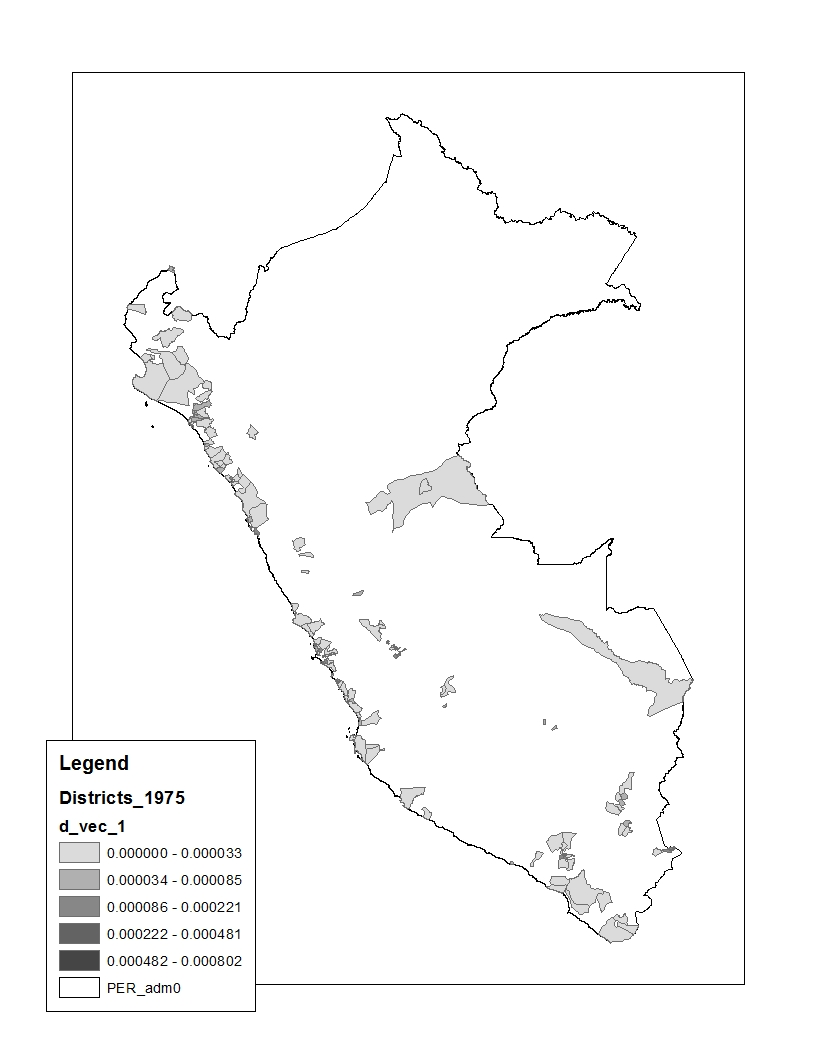

In [59]:
Image(path + "\\pics_Roads\\d_vec_1.jpg")